# Project Overview

This project explores the relationships between the physical and genetic characteristics of various soybean cultivars and two main indicators of productivity: thousand seed weight (MHG) and grain yield (GY). This project aims to develop predictive models for MHG and to identify clusters of cultivars with similar characteristics, thereby improving the selection of cultivars and cultivation practice, using a dataset that includes information on plant characteristics, as well as climatic conditions and soil properties from the data documentation.

## Table of Contents

1. **Data Description**: A detailed description of the dataset and variables.
2. **Data Preprocessing**: The methods used for cleaning and preparing the data for analysis.
3. **Exploratory Data Analysis (EDA)**: Exploring distributions, correlations, and patterns in the data.
4. **Predictive Modeling for MHG**:
    - Creating synthetic data for testing.
    - Selection and training of models.
    - Experimentation and hyper-parameter tuning.
5. **Clustering of Soybean Cultivars**: Techniques and results of clustering.
6. **Evaluation and Comparison of Models**: Methods and metrics for evaluation.
7. **Conclusions**: Summarizing findings and recommendations for agricultural practices.

## Problem-Solving Approach

The project adopts a two-stage approach to addressing the specified problems:

Firstly, a detailed exploratory analysis will be conducted to understand the correlations between variables and their impact on MHG and GY. This stage aims to address the following key questions:

1. What are the most important factors in determining MHG (Thousand seed weight)?
2. What are the most important factors in determining GY (Grain yield)?
3. What is the delta in MHG and GY from Season 1 to Season 2?

Secondly, the focus will be on developing the predictive model for MHG, using existing data and synthetic datasets generated to test the model's ability to generalize. Machine learning algorithms will be explored, with the best-performing models selected based on specific metrics.

In parallel, the project will implement clustering techniques to identify groups of soybean cultivars with similar characteristics, facilitating a deep understanding of genetic diversity and production potential.


# 1.Data description

The dataset for this project encompasses a collection of measurements and characteristics of soybean plants cultivated across two different planting seasons. The data includes information on physical plant traits, production performance, details about the cultivated soybean varieties, as well as data on environmental conditions and soil properties where the plants were grown.

## Dataset Variables

### data/data.csv

- **Season**: A numeric indicator (1 or 2) distinguishing between the two planting seasons for which data were collected. This variable reflects different timing and possible climatic variations between seasons.

- **Cultivar**: Categorical names of the 40 soybean varieties planted. Each variety possesses its own genetic characteristics that can influence growth, development, and yield.

- **Repetition**: The number of replications (1-4) for each variety in each season, indicating that data for each variety and season were collected multiple times to ensure the reliability of the results.

- **PH (Plant Height)**: The height of the plant measured in centimeters (cm), from the soil surface to the insertion of the last leaf.

- **IFP (Insertion of the First Pod)**: The height from the soil to the first pod of the plant, measured in centimeters (cm).

- **NLP (Number of Stems)**: The number of stems per plant, determined through manual counting.

- **NGP (Number of Legumes per Plant)**: The number of pods per plant, determined through manual counting.

- **NGL (Number of Grains per Plant)**: The total number of grains produced by a plant, determined through manual counting.

- **NS (Number of Grains per Pod)**: The number of grains found in a single pod, determined through manual counting.

- **MHG (Thousand Seed Weight)**: The weight, in grams (g), of a thousand seeds, used as an indicator of the size and quality of the seeds.

- **GY (Grain Yield)**: The grain production, expressed in kilograms per hectare (kg/ha), standardized to a grain moisture level of 13%.

### data/cultivars-description.ods

- **Cultivars (Varieties)**

- **Maturation Group**

- **Seeds per Meter/Linear**

- **Density per Meter/Linear**


## Additional Data

- **Precipitation and Average Temperature**: Level of precipitation and the average temperature during the two planting seasons.

![Precipitation and Average Temperature](data/hum_temp.png)

- **Chemical Soil Properties**

![Chemical Soil Properties](data/chem.png)


# 2.Data Preprocessing

In [3]:
import pandas as pd

In [4]:
data_path = 'data/data.csv'
cultivars_description_path = 'data/cultivars-description.ods'

data_df = pd.read_csv(data_path)
cultivars_description_df = pd.read_excel(cultivars_description_path, engine='odf')

In [5]:
data_df.head()

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,NEO 760 CE,1,58.80,15.20,98.2,177.80,1.81,5.2,152.20,3232.82
1,1,NEO 760 CE,2,58.60,13.40,102.0,195.00,1.85,7.2,141.69,3517.36
2,1,NEO 760 CE,3,63.40,17.20,100.4,203.00,2.02,6.8,148.81,3391.46
3,1,NEO 760 CE,4,60.27,15.27,100.2,191.93,1.89,6.4,148.50,3312.58
4,1,MANU IPRO,1,81.20,18.00,98.8,173.00,1.75,7.4,145.59,3230.99


In [6]:
cultivars_description_df.head()

,Cultivars,Maturation group,Seeds per meter/linear,Density per meter/linear
0,FTR 3190 IPRO,9.0,12.5,250000
1,FTR 4288 IPRO,8.8,11.0,220000
2,NK 8770 IPRO,8.7,16.0,320000
3,M 8606I2X,8.6,10.0,200000
4,M 8644 IPRO,8.6,11.0,220000


# 3. Exploratory Data Analysis 

In the dataset paper the is already an dataset summary.
![Dataset summary](data/data_summary.png)

Almost all mean and median variations don't tend to have big differences. This might suggest that there are no extreme factors significantly affecting the yield or seed weight. It also suggests that there are not many outliers in the data.

 TSW and GY show a wide range of values ​​with a significant standard deviation, suggesting variation in seed weight and grain yield among different soybean cultivars and seasons.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

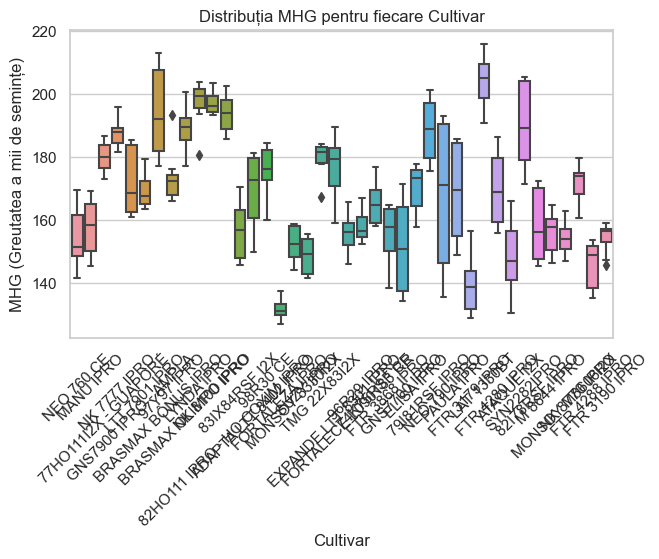

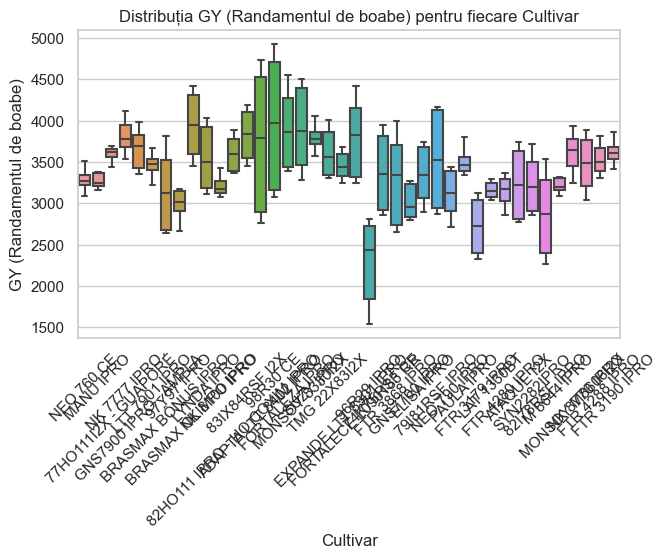

In [12]:
sns.set(style="whitegrid")

# Crearea unui grafic pentru MHG grupat după Cultivar
plt.figure(figsize=(7, 4))
sns.boxplot(x='Cultivar', y='MHG', data=data_df)
plt.title('Distribuția MHG pentru fiecare Cultivar')
plt.xticks(rotation=45)
plt.xlabel('Cultivar')
plt.ylabel('MHG (Greutatea a mii de semințe)')
plt.show()

# Crearea unui grafic pentru GY grupat după Cultivar
plt.figure(figsize=(7, 4))
sns.boxplot(x='Cultivar', y='GY', data=data_df)
plt.title('Distribuția GY (Randamentul de boabe) pentru fiecare Cultivar')
plt.xticks(rotation=45)
plt.xlabel('Cultivar')
plt.ylabel('GY (Randamentul de boabe)')
plt.show()

pentru ca exista o distributie mare pentru majoritatea soiurilor, asta ma duce cu gandul la faptul ca ar putea exista diferente date de faptul ca plantele au fost plantate diferite si au avut alta umiditate si temperatura in momente diferite ale dezvoltarii lor

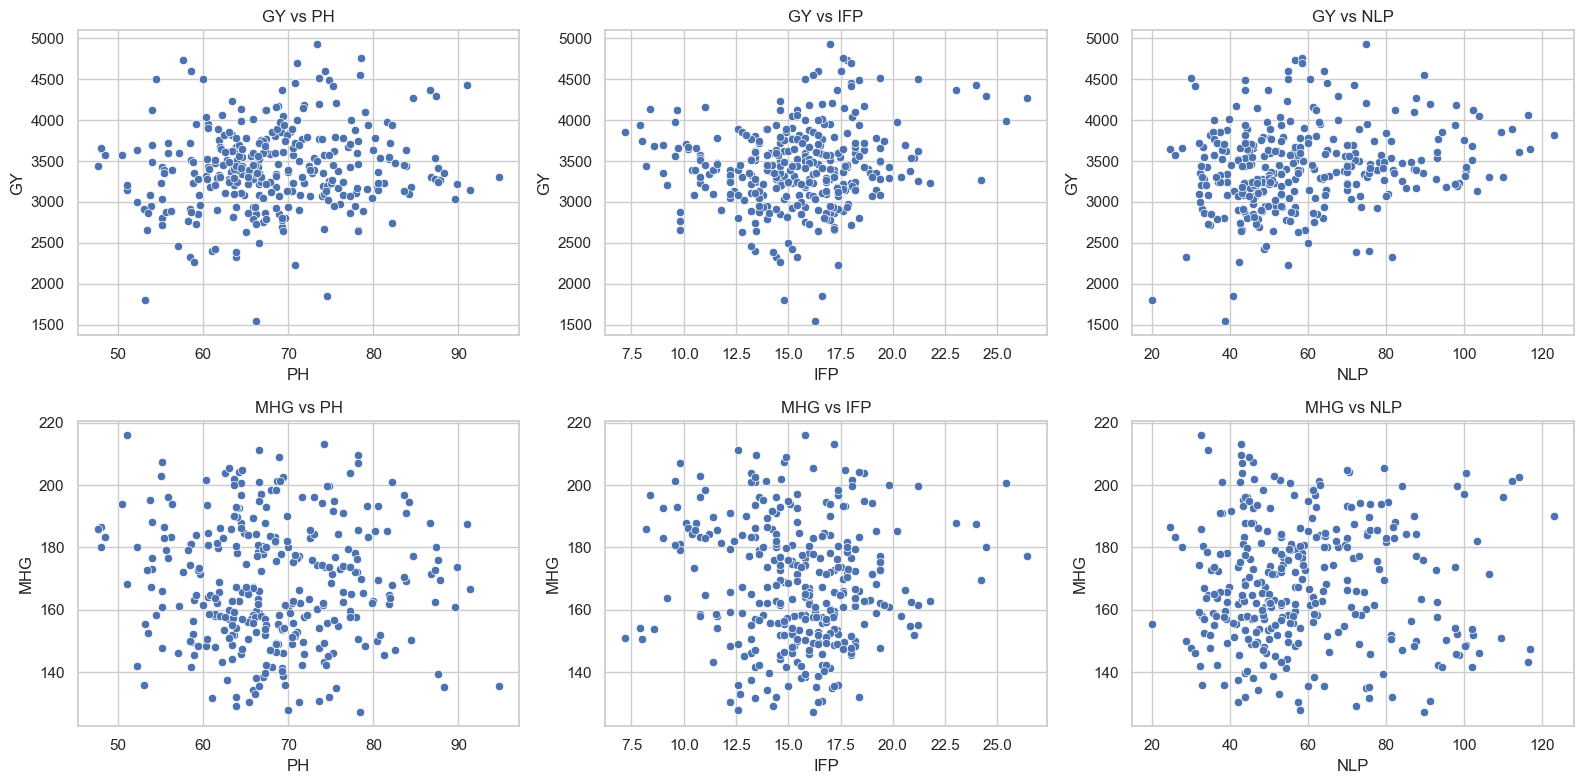

Matricea de corelație pentru variabilele selectate:


,MHG,GY
PH,-0.046618,0.123281
IFP,-0.071123,0.139090
NLP,-0.000687,0.198741
NGP,0.032085,0.238883
NGL,0.051604,0.077404
NS,-0.129252,0.167022
MHG,1.000000,0.074552
GY,0.074552,1.000000


In [16]:
plt.figure(figsize=(16, 8))

#'GY' vs 'PH'
plt.subplot(2, 3, 1)
sns.scatterplot(x=data_df['PH'], y=data_df['GY'])
plt.title('GY vs PH')

#'GY' vs 'IFP'
plt.subplot(2, 3, 2)
sns.scatterplot(x=data_df['IFP'], y=data_df['GY'])
plt.title('GY vs IFP')

#'GY' vs 'NLP'
plt.subplot(2, 3, 3)
sns.scatterplot(x=data_df['NLP'], y=data_df['GY'])
plt.title('GY vs NLP')

#'MHG' vs 'PH'
plt.subplot(2, 3, 4)
sns.scatterplot(x=data_df['PH'], y=data_df['MHG'])
plt.title('MHG vs PH')

#'MHG' vs 'IFP'
plt.subplot(2, 3, 5)
sns.scatterplot(x=data_df['IFP'], y=data_df['MHG'])
plt.title('MHG vs IFP')

# 'MHG' vs 'NLP'
plt.subplot(2, 3, 6)
sns.scatterplot(x=data_df['NLP'], y=data_df['MHG'])
plt.title('MHG vs NLP')

plt.tight_layout()
plt.show()

# coeficienții de corelație pentru variabilele continue
correlation_matrix = data_df[['PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG', 'GY']].corr()
print("Matricea de corelație pentru variabilele selectate:")
correlation_matrix[['MHG', 'GY']]


# Exploratory Data Analysis